# Proyecto Grupal - Proceso de EDA


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Dataset: datos_final.csv
#### Observamos nuestros datos por primera vez

In [86]:
df = pd.read_csv('datasets/datos_procesados/datos_final.csv')
df.head(10)

,Country Name,Año,Migración neta,Desempleo,PIB per cápita (US$ a precios actuales),hdi,Esperanza_vida,Año_prom_esc,PBI_per_cap_aj
0,Argentina,1990,6021.0,NaN,4330.967451,0.723,71.7837,8.126089,13597.68636
1,Argentina,1991,-8569.0,5.44,5730.723810,0.730,72.3190,8.192950,14803.99888
2,Argentina,1992,-13201.0,6.36,6815.331623,0.735,72.4295,8.260361,15940.72602
3,Argentina,1993,-16383.0,10.10,6957.417499,0.739,72.5646,8.327772,17132.68448
4,Argentina,1994,-18725.0,11.76,7464.474737,0.744,73.1725,8.395183,17874.84399
5,Argentina,1995,-19736.0,18.80,7383.704510,0.745,73.1333,8.462594,17091.77126
6,Argentina,1996,-20396.0,17.11,7690.157003,0.751,73.3066,8.530005,17782.84547
7,Argentina,1997,-20588.0,14.82,8176.771195,0.756,73.0899,8.597416,18984.60422
8,Argentina,1998,-20331.0,12.65,8250.673174,0.762,73.4737,8.664827,19427.08332
9,Argentina,1999,-20220.0,14.05,7735.322080,0.773,73.7219,8.732238,18535.78094


### **Variables del dataset**:
- **Variables continuas:** 'Migración neta', 'Desempleo','PIB per cápita (US$ a precios actuales)','hdi', 'Esperanza_vida', 'Año_prom_esc' y 'PBI_per_cap_aj' para cada país, entre los años 1960 y 2021

- **Variable discreta:** 'Año'

- **Variables  categoricas:** 'Country name', 'Country Code', 'Indicator Name' y 'Indicator Code'.

| Fuente | Tipo Datos |
| - |- |
| Año | Año a los que corresponden los datos. |
| Migración neta | Diferencia entre la inmigración y la emigración. |
| Desempleo | Persona que busca empleo y pero no lo tiene. |
| PIB per cápita | Producto Interno Bruto por persona. |
| hdi | Indice de Desarrollo Humano. |
| Esperanza_vida | La esperanza de vida es la media de la cantidad de años que vive una determinada población. |
| Año_prom_esc | Número de años promedio de educación de una persona. |

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Country Name                             960 non-null    object 
 1   Año                                      960 non-null    int64  
 2   Migración neta                           960 non-null    float64
 3   Desempleo                                868 non-null    float64
 4   PIB per cápita (US$ a precios actuales)  952 non-null    float64
 5   hdi                                      926 non-null    float64
 6   Esperanza_vida                           960 non-null    float64
 7   Año_prom_esc                             938 non-null    float64
 8   PBI_per_cap_aj                           960 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 67.6+ KB


##### Vemos que se trata de un dataframe con 856 registros con 9 columnas. 
##### Observamos que las variables categóricas son del tipo de dato 'object' y los datos de las migraciones neta son del tipo de dato 'float64'. 

### **Valores nulos que posee nuestro dataset**
Como podemos observar el dataset no posee datos nulos porque anteriormente fueron tratados en [ETL](ETL.py).

In [88]:
valores_nulos = df.isnull().sum()
valores_nulos.head(30)

Country Name                                0
Año                                         0
Migración neta                              0
Desempleo                                  92
PIB per cápita (US$ a precios actuales)     8
hdi                                        34
Esperanza_vida                              0
Año_prom_esc                               22
PBI_per_cap_aj                              0
dtype: int64

In [5]:
# Cambiamos el nombre de la columna PIB per cápita (US$ a precios actuales)
df.rename(columns={"PIB per cápita (US$ a precios actuales)": "PIB per cápita"}, inplace=True)

Estudio variables cualitativas.

In [6]:
# Tenemos 31 años
df['Año'].unique()

array([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
      dtype=int64)

In [7]:
# Tenemos 31 años
df['Country Name'].unique()

array(['Argentina', 'Antigua y Barbuda', 'Bahamas', 'Belice', 'Bolivia',
       'Brasil', 'Canadá', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'República Dominicana', 'Ecuador', 'Granada', 'Guatemala',
       'Guyana', 'Honduras', 'Haití', 'Jamaica', 'Santa Lucía', 'México',
       'Nicaragua', 'Panamá', 'Perú', 'Paraguay', 'El Salvador',
       'Trinidad y Tobago', 'Uruguay', 'Estados Unidos', 'Venezuela'],
      dtype=object)

Estudio cuantitativo de variables.

In [8]:
# Se pueden observar los valores de minimo y maximo para cada variable de cada país para ver si hay valores extremos.
df[df['Country Name'] == 'Uruguay'].describe()

,Año,Migración neta,Desempleo,PIB per cápita,hdi,Esperanza_vida,Año_prom_esc,PBI_per_cap_aj
count,32.000000,32.000000,31.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2005.500000,-8144.906250,9.784839,10050.500160,0.768500,75.814694,8.231768,16401.797006
std,9.380832,4377.288013,2.793171,5736.964093,0.038814,1.547816,0.602549,3770.715109
min,1990.000000,-17099.000000,6.310000,2983.243736,0.701000,73.161700,7.151283,10699.720840
25%,1997.750000,-9783.000000,7.865000,5416.881066,0.741750,74.469525,7.837035,13034.737122
50%,2005.500000,-7597.000000,9.040000,7350.501056,0.770000,76.100200,8.371835,14980.075430
75%,2013.250000,-5469.750000,11.140000,16274.924153,0.805750,77.143250,8.678057,20498.023515
max,2021.000000,-1486.000000,16.660000,19026.049611,0.821000,78.429800,8.982550,21916.768220


### Funciones auxiiares

In [9]:
def filtrar_fila(valor):
    filas_filtrada = df[df['Country Name'] == valor]
    filas_filtrada.reset_index(drop=True, inplace=True)
    return filas_filtrada

In [10]:
def graficar_paises (pais1, pais2, pais3, pais4, pais5):

    df_corte1 = filtrar_fila(pais1)
    df_corte2 = filtrar_fila(pais2)
    df_corte3 = filtrar_fila(pais3)
    df_corte4 = filtrar_fila(pais4)
    df_corte5 = filtrar_fila(pais5)

    x1 = df_corte1['Año']
    y1 = df_corte1['Migración neta']

    x2 = df_corte2['Año']
    y2 = df_corte2['Migración neta']

    x3 = df_corte3['Año']
    y3 = df_corte3['Migración neta']

    x4 = df_corte4['Año']
    y4 = df_corte4['Migración neta']

    x5 = df_corte5['Año']
    y5 = df_corte5['Migración neta']

    # Generamos la figura y los ejes
    fig = plt.figure(figsize=(12, 6))
    ax = plt.axes()

    plt.title('Migración neta')

    # límites de los ejes
    plt.xlim(1990, 2025)
    # plt.ylim(0, 500)

    plt.xticks(np.arange(1990, 2025, 5))
    # plt.yticks(np.arange(0, 501, 100))

    # Ploteamos las dos lineas, dandole un nombre a cada una mediante el parámetro 'label'
    ax.plot(x1, y1, label=df_corte1.loc[0,'Country Name'])
    ax.plot(x2, y2, label=df_corte2.loc[0,'Country Name'])
    ax.plot(x3, y3, label=df_corte3.loc[0,'Country Name'])
    ax.plot(x4, y4, label=df_corte4.loc[0,'Country Name'])
    ax.plot(x5, y5, label=df_corte5.loc[0,'Country Name'])

    # Agregamos la leyenda al gráfico,
    ax.legend() 

# graficar_paises('Argentina', 'Uruguay', 'Bahamas', 'Belice', 'Bolivia')


In [93]:
def graficar_varios_paises(paises, variable):

    # num_plots = 5
    fig, axs = plt.subplots(2, 2, figsize=(10, 6))    

    # axs[0].set_title(pais)
    
    cols = ['Migración neta', variable]

    for i in range(2):
        for j in range(2):
            pais = paises[i+j*2]
            # print(pais)
            df_fil = filtrar_fila(pais)

            anio = df_fil['Año']
            axs[i, j].set_xlabel('Año')
            axs[i, j].set_ylabel(cols[1])
            # Normalizo
            cols_norm = (df_fil[cols] - df_fil[cols].min()) / (df_fil[cols].max() - df_fil[cols].min())
            axs[i, j].plot(anio, cols_norm, label=cols)   
            axs[i, j].set_title(pais)
            axs[i, j].legend()

    plt.tight_layout()
    plt.show()

In [11]:
def graficar_cols(pais):

    y_list = ['Migración neta', 'hdi', 'Año_prom_esc', 'Desempleo', 'Esperanza_vida']

    num_plots = 5
    fig, axs = plt.subplots(num_plots, 1, figsize=(8, 2 * num_plots))    

    axs[0].set_title(pais)

    for i, col in enumerate(y_list):
        df_fil = filtrar_fila(pais)
        anio = df_fil['Año']
        axs[i].set_xlabel('Año')
        axs[i].set_ylabel(col)    
        axs[i].plot(anio, df_fil[col], label=col)                
        # axs[i].legend()

    plt.tight_layout()
    plt.show()

In [12]:
def graficar(paises_dict):
    num_plots = len(paises_dict)
    fig, axs = plt.subplots(num_plots, 2, figsize=(10, 3 * num_plots))    
    
    for i, (pais, conjuntos_columnas) in enumerate(paises_dict.items()):
        df_fil = filtrar_fila(pais)
        anio = df_fil['Año']
            
        for j, columnas in enumerate(conjuntos_columnas):
            axs[i, j].set_title(pais)
            axs[i, j].set_xlabel('Año')
            axs[i, j].set_ylabel('Valor Normalizado')
                
            for col in columnas:
                col_norm = (df_fil[col] - df_fil[col].min()) / (df_fil[col].max() - df_fil[col].min())
                axs[i, j].plot(anio, col_norm, label=col)
                    
            axs[i, j].legend()   
        
    plt.tight_layout()
    plt.show()

In [13]:
filtrar_fila('Perú')

,Country Name,Año,Migración neta,Desempleo,PIB per cápita,hdi,Esperanza_vida,Año_prom_esc,PBI_per_cap_aj
0,Perú,1990,-35982.0,NaN,1194.548302,0.621,65.1059,7.781378,4943.405647
1,Perú,1991,-61663.0,4.652,1520.677362,0.625,65.4342,7.838587,5137.237402
2,Perú,1992,-51779.0,4.800,1560.546504,0.625,66.1489,7.896217,4990.049823
3,Perú,1993,-51720.0,4.578,1481.340989,0.629,66.6814,7.954270,5133.395794
4,Perú,1994,-39297.0,4.324,1871.392109,0.639,67.2268,8.012750,5629.329259
5,Perú,1995,-46443.0,4.544,2180.566639,0.647,67.6445,8.071230,5912.585584
6,Perú,1996,-38694.0,4.769,2218.321747,0.651,68.1474,8.129710,6041.510865
7,Perú,1997,-32467.0,4.640,2292.396517,0.656,68.6052,8.188190,6334.454835
8,Perú,1998,-35941.0,4.975,2149.701063,0.664,69.0820,8.246670,6260.683714
9,Perú,1999,-60881.0,4.920,1911.735017,0.673,69.7427,8.305150,6251.097403


## Gráficos

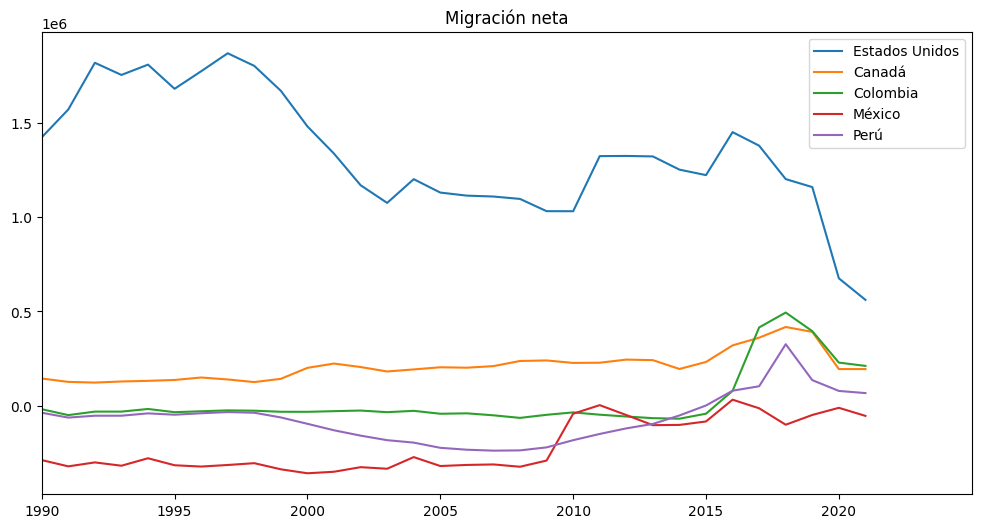

In [14]:
graficar_paises('Estados Unidos', 'Canadá', 'Colombia', 'México', 'Perú')

### **Observaciones:**

- En este gráfico se puede observar que Estados Unidos tiene valores positivos de migración neta, sus valores más altos alcanzan casi los 2 millones en los 90', lo que nos estaría indicando que en Estados Unidos hay mayor inmigración que emigración. El mismo comportamiento sucede en Canadá pero en menor medida.

- En el caso de Perú desde los años 90' hasta el año 2014 la migración neta siempre fue negativa para luego alcanzar su pico mas alto de migración neta en el año 2018.
Un caso similar al de Perú es Colombia que desde los año 90' tiene una migración neta negativa, y recien en el año 2016 comienza subir, alcanzando su pico más alto en el 2018.

- En el caso de México su migración neta siempre se mantuvo negativa, pero hubo un pequeño aumento a partir del año 2010.


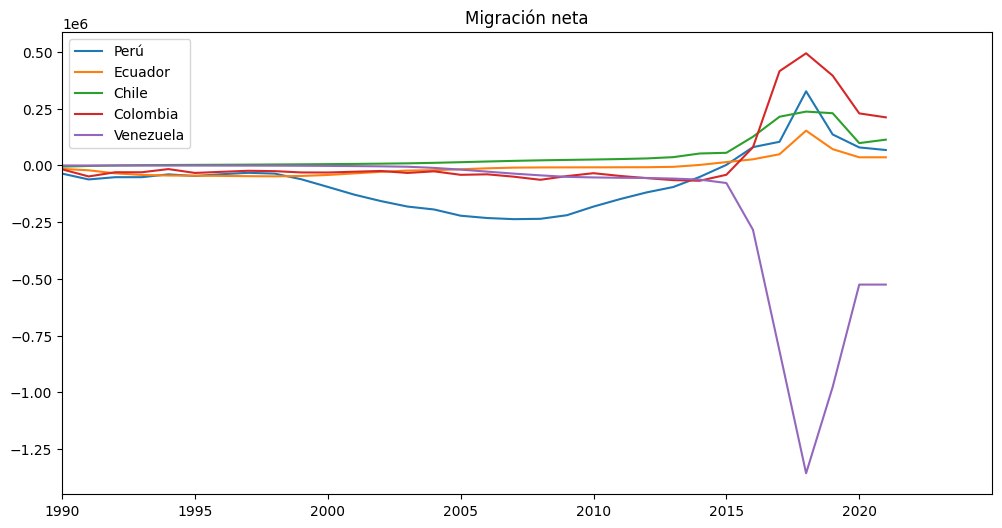

In [15]:
#Grafico
graficar_paises('Perú', 'Ecuador', 'Chile', 'Colombia','Venezuela')

#### **Observaciones:**

- En este gráfico se puede observar que lo más significativo es la migración neta negativa de Venezuela a partir del año 2015, posiblemente sea consecuencia de la crisis economica a que apareció en la primera presidencia de Maduro. También se puede observar un aumento significativo de inmigración en Colombia a partir del año 2015 que dado su cercania geografica con Venezuela podría ser atribuido a un flujo migratorio entre ambos paises.

- En otros países como Chile, Perú y Ecuador se puede observar un pequeño aumento en migración neta, posiblemente también sean afectadas por la emigración masiva de Venezuela.

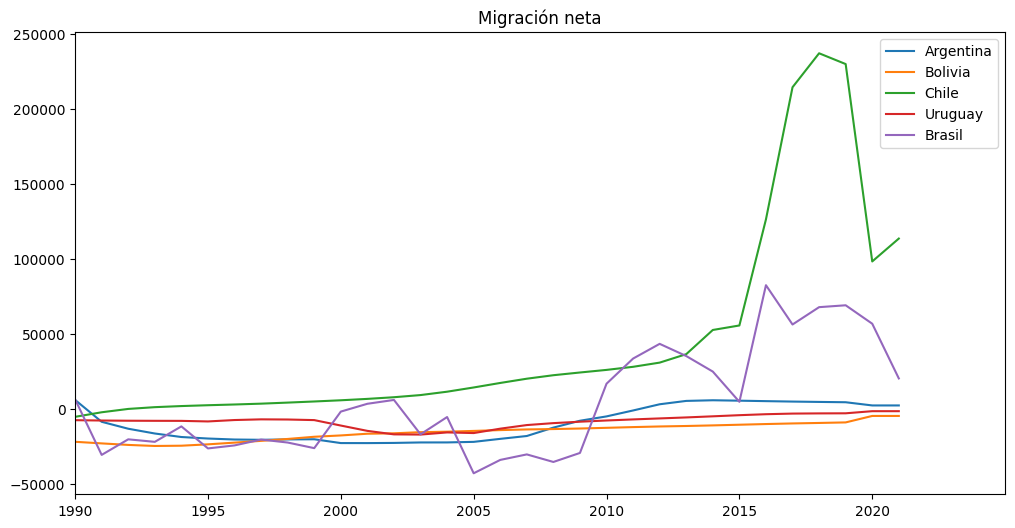

In [16]:
#Grafico
graficar_paises('Argentina','Bolivia','Chile', 'Uruguay', 'Brasil')

#### **Observaciones:**

- En estos países de America del Sur se esperaría que tengan valores similares de migración neta, sin embargo no es así, en el gráfico se observa que chile tiene una migración neta en constante aumento. En el caso de Brasil se puede observar que tenía una tendencia a la migración neta negativa hasta el año 2010, y a partir de dicho año comienza aumentar.

- Bolivia y Uruguay tienen valores negativos de migración desde los años 90'.

- Argentina tiene valores negativos de migración neta desde el año 1991 hasta el año 2011, y luego aumenta a valores positivos, esto se podría deber a que estan inmigrando personas.

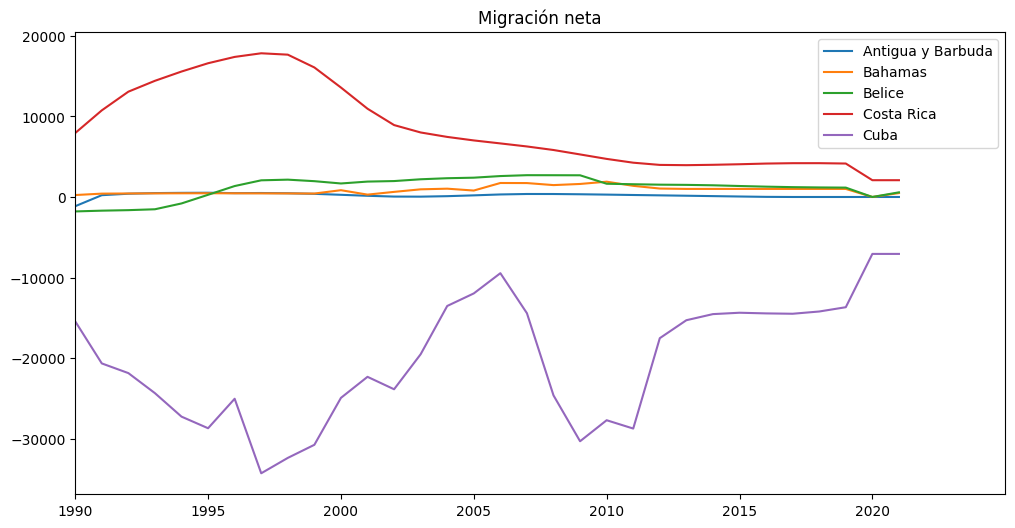

In [17]:
#Grafico
graficar_paises('Antigua y Barbuda', 'Bahamas', 'Belice', 'Costa Rica', 'Cuba')

#### **Observaciones:**

- En este gráfico se puede observar que Bahamas, Belice y Antigua Barbuda tienen valores cercanos a 0, por lo que se puede decir decir que en estos paises prácticamente no hay ni inmigración ni emigración. En cambio para Cuba el valor de migración neta desde los años 90' hasta la actualidad siempre fue negativa, esto se debe principalmente a que este país se encuentra en un regimen comunista y sus habitantes tienden a emigrar hacia otros paises. Por otro lado tenemos a Costa Rica, que tiene valores positivos migración neta, por lo que es de esperar que haya mayor número de inmigrantes que de emigrantes.

---

In [18]:
filtrar_fila('Colombia')

,Country Name,Año,Migración neta,Desempleo,PIB per cápita,hdi,Esperanza_vida,Año_prom_esc,PBI_per_cap_aj
0,Colombia,1990,-17237.0,NaN,1467.547436,0.610,68.6440,6.340998,7932.945509
1,Colombia,1991,-48488.0,10.120,1491.856728,0.619,68.8127,6.392191,7978.104071
2,Colombia,1992,-29969.0,9.440,1720.568557,0.628,69.0381,6.443797,8174.492145
3,Colombia,1993,-30020.0,7.800,1920.398967,0.635,69.3418,6.495820,8526.156226
4,Colombia,1994,-16033.0,8.250,2314.900990,0.640,69.6132,6.548263,8940.705583
5,Colombia,1995,-33016.0,8.720,2571.468190,0.645,69.9325,6.600705,9243.606085
6,Colombia,1996,-28154.0,11.810,2652.103881,0.653,70.1885,6.653148,9230.173967
7,Colombia,1997,-23520.0,12.140,2860.040941,0.660,70.4919,6.705591,9376.680714
8,Colombia,1998,-25134.0,15.000,2595.543012,0.665,70.7378,6.758034,9318.106668
9,Colombia,1999,-30850.0,20.060,2236.072925,0.663,70.9257,6.810476,8792.958415


**Funcion que permite poder graficar todas las variables de un mismo país.**

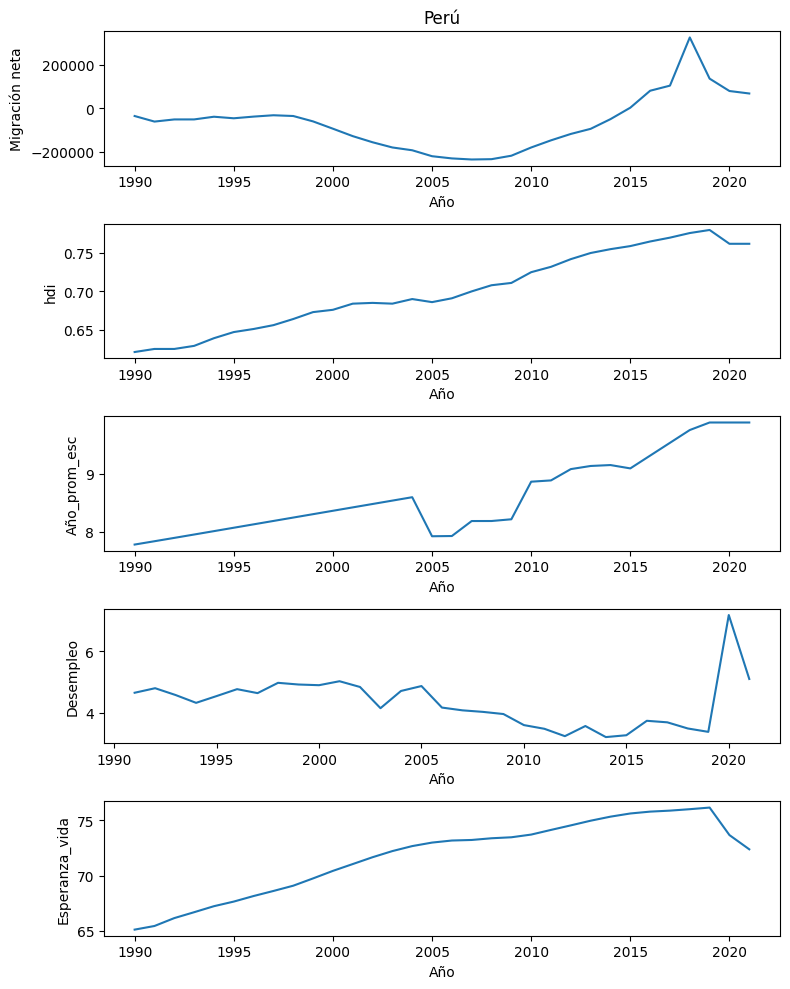

In [19]:
graficar_cols('Perú')

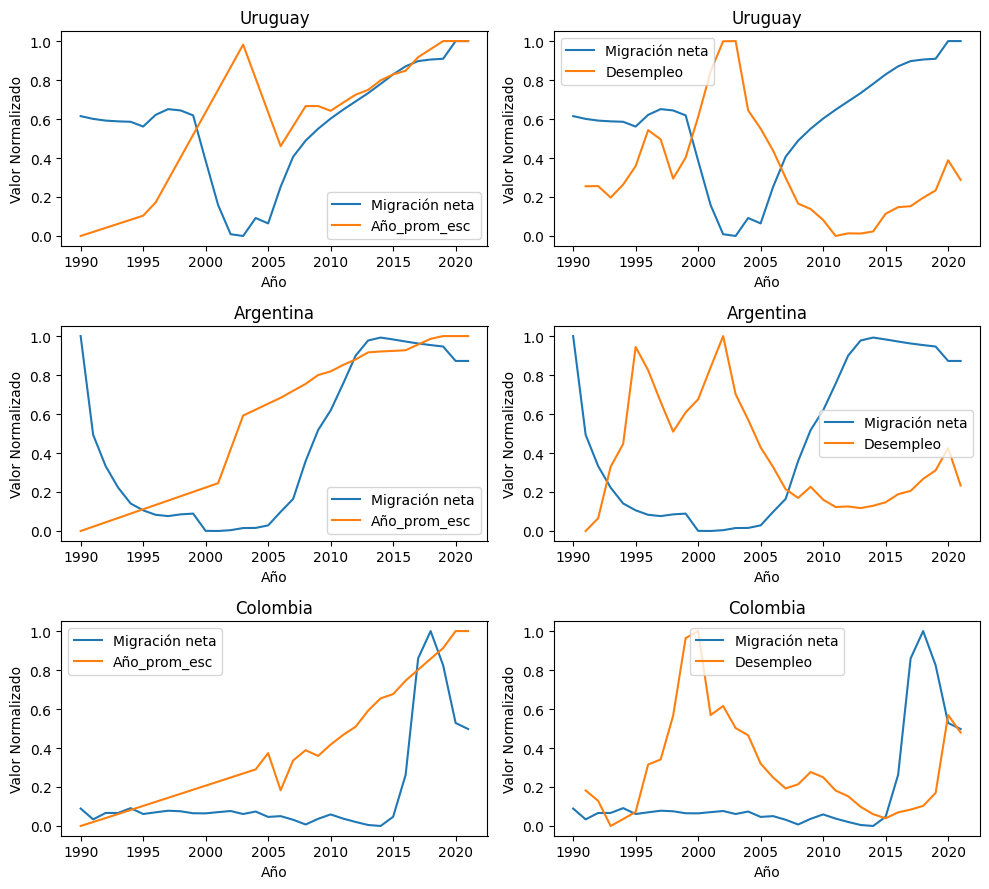

In [92]:
paises = {
    'Uruguay': [['Migración neta', 'Año_prom_esc'], ['Migración neta', 'Desempleo' ]],
    'Argentina': [['Migración neta', 'Año_prom_esc'], ['Migración neta', 'Desempleo']],
    'Colombia': [['Migración neta', 'Año_prom_esc'], ['Migración neta', 'Desempleo']],
}

graficar(paises)

In [59]:
df['Country Name'].unique()

array(['Argentina', 'Antigua y Barbuda', 'Bahamas', 'Belice', 'Bolivia',
       'Brasil', 'Canadá', 'Chile', 'Colombia', 'Costa Rica', 'Cuba',
       'República Dominicana', 'Ecuador', 'Granada', 'Guatemala',
       'Guyana', 'Honduras', 'Haití', 'Jamaica', 'Santa Lucía', 'México',
       'Nicaragua', 'Panamá', 'Perú', 'Paraguay', 'El Salvador',
       'Trinidad y Tobago', 'Uruguay', 'Estados Unidos', 'Venezuela'],
      dtype=object)

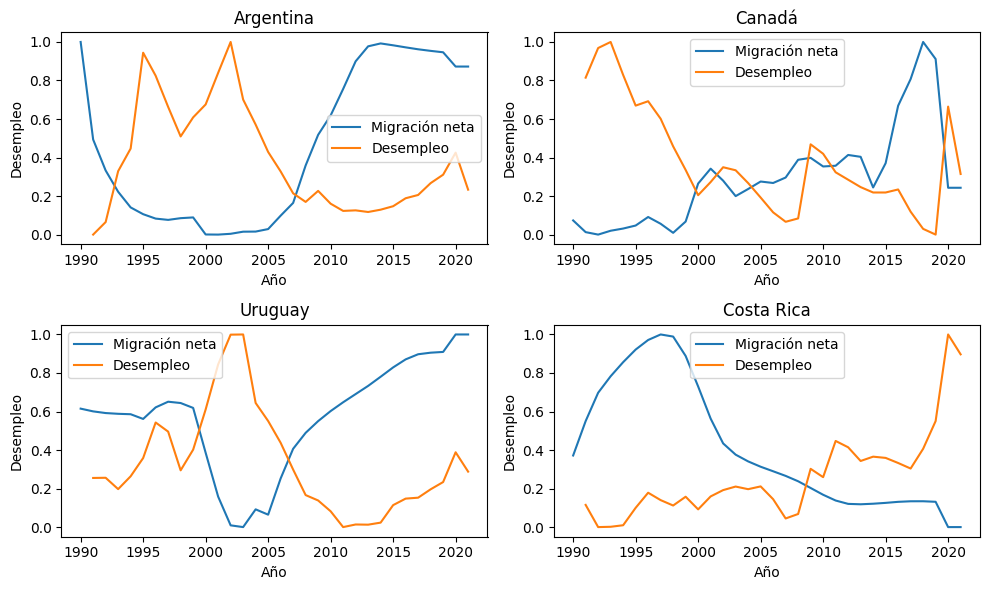

In [91]:
graficar_varios_paises(['Argentina', 'Uruguay', 'Canadá', 'Costa Rica'], 'Desempleo')

Por ejemplo en estos cuatro paises podemos ver una relacion entre el `desempleo` y la `migración neta`, que sería razonable ya que cuando hay menos empleo hay mas chances de que la gente salga a buscar oportunidades nuevas en otros países.

In [30]:
df.head()

,Country Name,Año,Migración neta,Desempleo,PIB per cápita,hdi,Esperanza_vida,Año_prom_esc,PBI_per_cap_aj
0,Argentina,1990,6021.0,NaN,4330.967451,0.723,71.7837,8.126089,13597.68636
1,Argentina,1991,-8569.0,5.44,5730.723810,0.730,72.3190,8.192950,14803.99888
2,Argentina,1992,-13201.0,6.36,6815.331623,0.735,72.4295,8.260361,15940.72602
3,Argentina,1993,-16383.0,10.10,6957.417499,0.739,72.5646,8.327772,17132.68448
4,Argentina,1994,-18725.0,11.76,7464.474737,0.744,73.1725,8.395183,17874.84399


---

### Matriz de Correlación

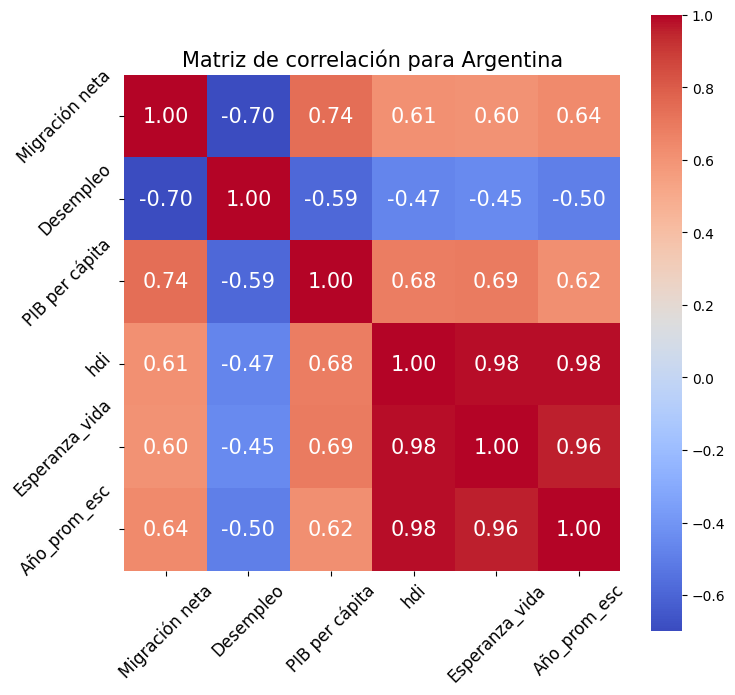

In [84]:
pais = 'Argentina'
# pais = 'Estados Unidos'
df_corte = filtrar_fila(pais)

df_corte = df_corte.drop(['Country Name','Año','PBI_per_cap_aj'], axis=1)

#Heatmap
corr = df_corte.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= df_corte.columns, 
           yticklabels= df_corte.columns,
           cmap= 'coolwarm')
plt.xticks(rotation = 45, fontsize=12)
plt.yticks(rotation = 45, fontsize=12)
plt.title(f'Matriz de correlación para {pais}', fontdict={'size':15})
plt.show()

Mirando la matriz de correlación (por ejemplo en este caso para Argentina) se pueden ver que el desempleo tiene una correlación inversa al flujo migratorio como se explicó anteriormente.

Pero también se puede ver que otros indicadores como son el HDI, promedio años de escolarización y Esperanza de vida tienen una correlación positiva con respecto a la migración.

### **Conclusiones**

- En general el desempleo y la migración neta tienen una buena correlación. Esto sería razonable ya que cuando hay menos empleo es mas probable de que la gente salga a buscar nuevas oportunidades en otros países.

- Hay algunas excepciones como el caso de los Estados Unidos es un país que recibe tanta inmigración que por más que haya más desempleo su migración neta no se ve afectada.

- Tambien resulta interesante mencionar el caso de Venezuela, que a partir del año 2015, posiblemente consecuencia de la crisis economica a que apareció en la primera presidencia de Maduro, tuvo un gran crecimiento en la emigración de su país. Esto impactó en Varios países vecinos como el caso de Colombia que tuvieron un aumento enla inmigración a partir de ese periodo.

- Se podrian utilizar indicadores como el HDI, Desempleo y promedio años de escolarización como explicaciónes de ciertos flujos migratorios.

- Es importante remarcar que, siendo que tenemos datos de Migración Neta y no de inmigración y emigración, a veces resulta dificil detectar si fue que no hubo cambios en la migración o si en realidad hubo paro fue un cambio balanceado entre ambos valores que no se logra interpretar al analizar la migración neta.